In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/admission_data.csv')

In [ ]:
df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [ ]:
df.shape

(500, 8)

In [ ]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# check duplicates in dataset
df.duplicated().sum()

0

In [ ]:
# split input and output
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test ,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

mim max scallar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc=MinMaxScaler()

In [ ]:
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
x_test_scaled=pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)

In [ ]:
X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.62,0.678571,0.50,0.625,0.714286,0.650641,1.0
1,0.52,0.678571,0.75,0.750,1.000000,0.557692,0.0
2,0.26,0.357143,0.50,0.625,0.428571,0.544872,0.0
3,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
4,0.36,0.500000,0.50,0.625,0.285714,0.451923,1.0
...,...,...,...,...,...,...,...
395,0.78,0.678571,0.75,0.875,0.857143,0.762821,1.0
396,0.32,0.464286,0.25,0.375,0.428571,0.455128,1.0
397,0.24,0.250000,0.00,0.250,0.142857,0.144231,0.0
398,0.38,0.464286,0.25,0.375,0.714286,0.282051,0.0


# build ANN Model

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 102 (408.00 Byte)
Trainable params: 102 (408.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


compile the model

In [ ]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

train the model

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 0.5015 - accuracy: 0.0000e+00 - val_loss: 0.5053 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4249 - accuracy: 0.0000e+00 - val_loss: 0.4394 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3504 - accuracy: 0.0000e+00 - val_loss: 0.3755 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2816 - accuracy: 0.0000e+00 - val_loss: 0.3107 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2130 - accuracy: 0.0000e+00 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1444 - accuracy: 0.0000e+00 - val_loss: 0.1484 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0948 - accuracy: 0.0000e+00

predict the model

In [ ]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)*100

69.74997074023283

make graph for loss and validation loss

In [ ]:
import matplotlib.pyplot as plt


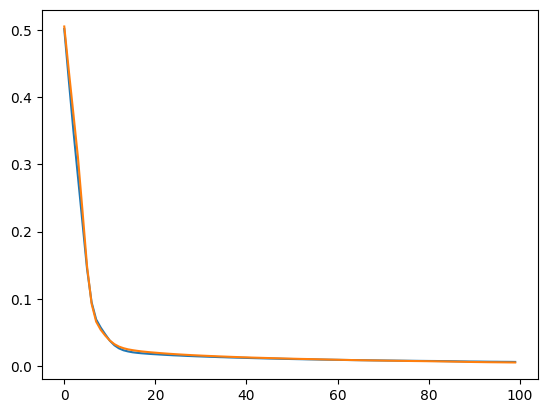

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

make plot for accuracy and validadion accuracy

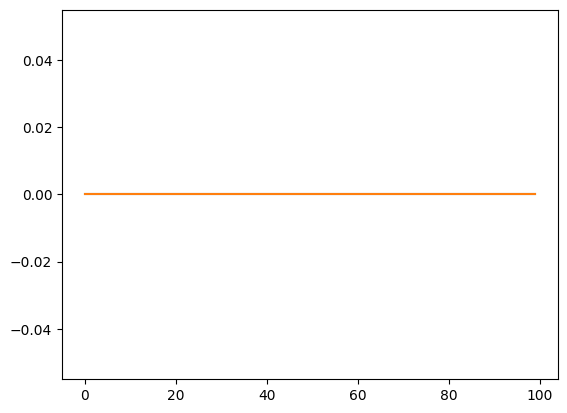

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])